In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# first we will anylize the last year data 2018
data_2018=pd.read_csv('game-2018.csv')
data_2018=data_2018.drop("Team", axis=1)
data_2018

,Team_ID,Played,Won,Lost,Tied,SD,Points,Win
0,1,22,17,3,2,118,93,0
1,2,22,15,5,2,189,86,0
2,3,22,11,9,2,-1,68,0
3,4,22,8,12,2,-45,52,0
4,5,22,6,13,3,-69,43,0
5,6,22,6,14,2,-91,42,0
6,7,22,13,7,2,104,78,0
7,8,22,12,8,2,2,69,1
8,9,22,8,10,4,-45,57,0
9,10,22,9,11,2,-10,55,0


In [120]:
df_train_2018,df_test_2018=train_test_split(data_2018,train_size=0.7,test_size=0.3,random_state=100)

In [121]:
y_train_2018=df_train_2018.pop('Win')
x_train_2018=df_train_2018

y_test_2018=df_test_2018.pop('Win')
x_test_2018=df_test_2018

scaler_2018=MinMaxScaler()

In [122]:
num_vars=['Played','Won','Lost','Tied','SD','Points']
df_train_2018[num_vars]=scaler_2018.fit_transform(df_train_2018[num_vars])
df_train_2018

C:\vikas\PYTHON\ANACONDA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\vikas\PYTHON\ANACONDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\vikas\PYTHON\ANACONDA\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Team_ID,Played,Won,Lost,Tied,SD,Points
4,5,0.0,0.083333,1.0,0.666667,0.005319,0.019608
2,3,0.0,0.500000,0.6,0.333333,0.367021,0.509804
0,1,0.0,1.000000,0.0,0.333333,1.000000,1.000000
10,11,0.0,0.250000,1.0,0.000000,0.079787,0.176471
7,8,0.0,0.583333,0.5,0.333333,0.382979,0.529412
3,4,0.0,0.250000,0.9,0.333333,0.132979,0.196078
11,12,0.0,0.000000,1.0,1.000000,0.000000,0.000000
8,9,0.0,0.250000,0.7,1.000000,0.132979,0.294118


In [123]:
x_train_2018=x_train_2018.drop(['Team_ID','Played','Tied'],axis=1)





In [124]:
lm_2018=LinearRegression()
lm_2018.fit(x_train_2018,y_train_2018)
ref_2018=RFE(lm_2018,n_features_to_select=7)
ref_2018=ref_2018.fit(x_train_2018,y_train_2018)

In [125]:
col_2018=x_train_2018.columns[ref_2018.support_]
col_2018
#list(zip(x_train_2018.columns,ref_2018.support_,ref_2018.ranking_))

Index(['Won', 'Lost', 'SD', 'Points'], dtype='object')

In [126]:
col_2018=x_train_2018.columns[ref_2018.support_]
x_train_ref_2018=x_train_2018[col_2018]

import statsmodels.api as sm
x_train_ref_2018=sm.add_constant(x_train_ref_2018)

C:\vikas\PYTHON\ANACONDA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [127]:
lm=sm.OLS(y_train_2018,x_train_ref_2018).fit()

In [128]:
lm.summary()

C:\vikas\PYTHON\ANACONDA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     2.597
Date:                Mon, 30 Sep 2019   Prob (F-statistic):              0.230
Time:                        19:46:06   Log-Likelihood:                 3.4833
No. Observations:                   8   AIC:                             3.033
Df Residuals:                       3   BIC:                             3.431
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9590      1.907      2.076      0.129      -2.110      10.028
Won            7.7766      2.956      2.631      0.078      -1.631      17.184
Lost          -4.2300      1.892     -2.235      0.111     -10.252       1.792
SD            -4.1282      1.632     -2.529      0.085      -9.322       1.066
Points        -7.5468      3.797     -1.988      0.141     -19.629       4.536
==============================================================================
Omnibus:                        0.627   Durbin-Watson:                   2.590
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.565
Skew:                           0.423   Prob(JB):                        0.754
Kurtosis:                       2.011   Cond. No.                         76.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
#Significance(p-value)
#vIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
vif=pd.DataFrame()
vif['Features']=x_train_2018.columns
vif['VIF']=[variance_inflation_factor(x_train_2018.values,i) for i in range(x_train_2018.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Won,172.23
3,Points,169.36
2,SD,45.10
1,Lost,2.97


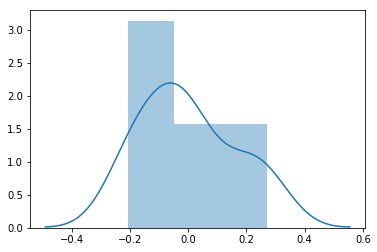

In [130]:
#from sklearn.metrics import r2_score
y_train_pred_2018=lm.predict(x_train_ref_2018)
res_2018=y_train_2018-y_train_pred_2018
sns.distplot(res_2018)

In [143]:
num_var_test=['Played','Won','Lost','Tied','SD','Points']
df_test_2018[num_var_test]=scaler_2018.fit_transform(df_test_2018[num_var_test])

df_test_2018=df_test_2018.drop(['Team_ID','Played','Tied'],axis=1)

df_test_2018

C:\vikas\PYTHON\ANACONDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\vikas\PYTHON\ANACONDA\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Won,Lost,SD,Points
9,0.333333,0.666667,0.289286,0.295455
6,0.777778,0.222222,0.696429,0.818182
1,1.000000,0.000000,1.000000,1.000000
5,0.000000,1.000000,0.000000,0.000000


In [144]:

x_test_sm=sm.add_constant(df_test_2018)



C:\vikas\PYTHON\ANACONDA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [146]:
y_test_pred=lm.predict(x_test_sm)
print(y_test_pred)
#so we can say
#the higestes chance to win
#followsd by
#1.Patna Pirates
#2.Bengaluru Bulls
#3.Dabang Delhi K.C.

9    0.307184
6    0.017775
1    0.060564
5   -0.271056
dtype: float64
